In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tuning import split_train_test
from main import DecisionTree

In [29]:
#import dataset
df = pd.read_csv("secondary_data.csv", delimiter=";")
df.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w


In [3]:
#DATASET EXPLORATION

print("\nData types:")
print(df.dtypes)

#1. column names
print("\nColumn names:")
print(df.columns)

# 2. check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

#3. basic statistics
print("\nBasic statistics:")
print(df.describe(include='all'))  # 'include=all' gives stats for both numerical and categorical columns

#4. check for duplicates
print("\nNumber of duplicate rows:")
print(df.duplicated().sum())

#5. summary of data information
print("\nData summary:")
print(df.info())


Data types:
class                    object
cap-diameter            float64
cap-shape                object
cap-surface              object
cap-color                object
does-bruise-or-bleed     object
gill-attachment          object
gill-spacing             object
gill-color               object
stem-height             float64
stem-width              float64
stem-root                object
stem-surface             object
stem-color               object
veil-type                object
veil-color               object
has-ring                 object
ring-type                object
spore-print-color        object
habitat                  object
season                   object
dtype: object

Column names:
Index(['class', 'cap-diameter', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-height', 'stem-width', 'stem-root', 'stem-surface', 'stem-color',
       'veil-type', 'veil-color', 'has-ring', 'ring-ty

In [30]:
# Separate features and target
X = df.drop('class', axis=1)
y = df['class']

In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cap-diameter          61069 non-null  float64
 1   cap-shape             61069 non-null  object 
 2   cap-surface           46949 non-null  object 
 3   cap-color             61069 non-null  object 
 4   does-bruise-or-bleed  61069 non-null  object 
 5   gill-attachment       51185 non-null  object 
 6   gill-spacing          36006 non-null  object 
 7   gill-color            61069 non-null  object 
 8   stem-height           61069 non-null  float64
 9   stem-width            61069 non-null  float64
 10  stem-root             9531 non-null   object 
 11  stem-surface          22945 non-null  object 
 12  stem-color            61069 non-null  object 
 13  veil-type             3177 non-null   object 
 14  veil-color            7413 non-null   object 
 15  has-ring           

In [ ]:
#Is the dataset balanced?
y.value_counts(normalize=True)

class
p    0.554913
e    0.445087
Name: proportion, dtype: float64

C:\Users\inase\AppData\Local\Temp\ipykernel_11300\3398709154.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=y_train, palette='Set2')


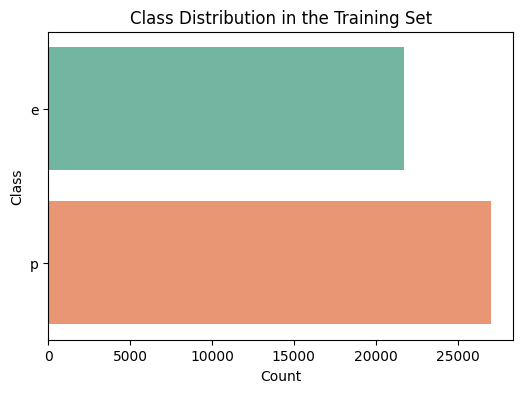

In [ ]:
#VISUALIZATION OF THE DISTRIBUTION OF (P) AND (E) IN THE SETS
plt.figure(figsize=(6, 4))
sns.countplot(y=y_train, palette='Set2')
plt.title('Class Distribution in the Training Set')
plt.xlabel('Count')
plt.ylabel('Class')
plt.show()

In [7]:
X_train, X_test, y_train, y_test = split_train_test(X, y, test_size=0.2)

In [ ]:
# Columns with more than 80% missing values
print('\n'.join([f"{col}: {perc:.2f}% missing values" 
                 for col, perc in (X_train.isnull().mean() * 100).items() if perc > 80]))


stem-root: 84.40% missing values
veil-type: 94.67% missing values
veil-color: 87.83% missing values
spore-print-color: 89.60% missing values


In [ ]:
missing_info = {col: perc for col, perc in (X_train.isnull().mean() * 100).items() if perc > 80}
print('\n'.join([f"{col}: {perc:.2f}% missing values" for col, perc in missing_info.items()]))

# Drop columns with more than 80% missing values 
cols_to_drop = list(missing_info.keys())
X_train = X_train.drop(columns=cols_to_drop)
X_test = X_test.drop(columns=cols_to_drop)

y_train = y_train.loc[X_train.index]
y_test = y_test.loc[X_test.index]


stem-root: 84.40% missing values
veil-type: 94.67% missing values
veil-color: 87.83% missing values
spore-print-color: 89.60% missing values


In [ ]:
#Fill in null values 
for col in X_train.columns:
    if X_train[col].dtype == 'object':
        new = X_train[col].mode()[0]
    else:
        new = X_train[col].median() # no numerical val missing
    X_train.loc[:, col] = X_train[col].fillna(new)
    X_test.loc[:, col] = X_test[col].fillna(new)

In [11]:
for col in X_train.columns:
    print(f"{col}: {X_train[col].value_counts()}")

cap-diameter: cap-diameter
3.18     87
3.13     80
4.04     79
3.24     79
3.91     77
         ..
23.38     1
19.02     1
53.66     1
54.73     1
50.72     1
Name: count, Length: 2458, dtype: int64
cap-shape: cap-shape
x    21482
f    10735
s     5713
b     4580
o     2813
p     2090
c     1443
Name: count, dtype: int64
cap-surface: cap-surface
t    17858
s     6094
y     5085
h     3960
g     3791
d     3542
e     2071
k     1843
i     1758
w     1724
l     1130
Name: count, dtype: int64
cap-color: cap-color
n    19400
y     6841
w     6149
g     3490
e     3225
o     2943
r     1429
p     1391
u     1370
k      999
b      969
l      650
Name: count, dtype: int64
does-bruise-or-bleed: does-bruise-or-bleed
f    40425
t     8431
Name: count, dtype: int64
gill-attachment: gill-attachment
a    18063
d     8184
x     5916
p     4782
s     4561
e     4525
f     2825
Name: count, dtype: int64
gill-spacing: gill-spacing
c    39811
d     6220
f     2825
Name: count, dtype: int64
gill-color: g

In [ ]:
# For avoiding overfitting
X_train = X_train.drop_duplicates()
y_train = y_train.loc[X_train.index]

In [3]:
decision_tree= DecisionTree(max_depth=5, entropy_threshold=0.1, min_samples_split=100)

In [5]:
#X_train.head()
#y_train.head()

In [16]:
decision_tree.fit(X_train, y_train)

In [17]:
y_pred = decision_tree.predict(X_test)

from performance import accuracy 
#accuracy(y_test, y_pred)

In [18]:
y_pred = pd.Series(y_pred, index=y_test.index)

0-1 Loss: 0.2649635634160321
Accuracy: 0.7350364365839679
Precision: 0.6453125
Recall: 0.9063643013899049
F1 Score: 0.7538789169455431
Confusion Matriy_pred:


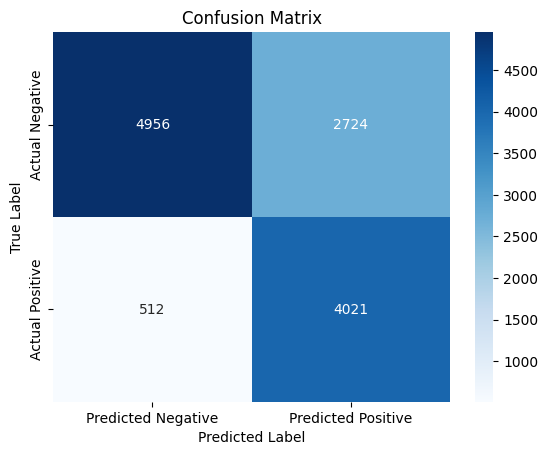

None


In [19]:
from performance import *
print_report(y_test, y_pred,'e')

In [26]:
from tuning import hyperparameter_tuning

param_grid = {
        'max_depth': [10, 50, 100],
        'min_samples_split': [2, 5, 10, 100],
        'split_function': ['gini','scaled_entropy', 'squared']
    }

best_params, best_score = hyperparameter_tuning(X_train, y_train, param_grid)

print(f"Best parameters: {best_params}")
print(f"Best score: {best_score}")

{'max_depth': 10, 'min_samples_split': 2, 'split_function': 'gini'}
Score:  0.07898245973946046
--------------------------------------------------
{'max_depth': 10, 'min_samples_split': 2, 'split_function': 'scaled_entropy'}
Score:  0.15396450918042875
--------------------------------------------------
{'max_depth': 10, 'min_samples_split': 2, 'split_function': 'squared'}
Score:  0.18996820186685814
--------------------------------------------------
{'max_depth': 10, 'min_samples_split': 5, 'split_function': 'gini'}
Score:  0.07908503436249872
--------------------------------------------------
{'max_depth': 10, 'min_samples_split': 5, 'split_function': 'scaled_entropy'}
Score:  0.1541696584265053
--------------------------------------------------
{'max_depth': 10, 'min_samples_split': 5, 'split_function': 'squared'}
Score:  0.1897630526207816
--------------------------------------------------
{'max_depth': 10, 'min_samples_split': 10, 'split_function': 'gini'}
Score:  0.079495332854651

0-1 Loss: 0.0022926389912388437
Accuracy: 0.9977073610087611
Precision: 0.9987165383204987
Recall: 0.9961594732991953
F1 Score: 0.9974363669657571
Confusion Matriy_pred:


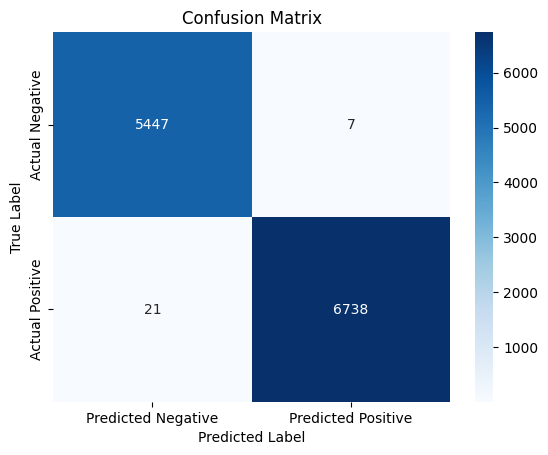

None


In [27]:
#run decision tree with best parameters
decision_tree = DecisionTree(**best_params)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
y_pred = pd.Series(y_pred, index=y_test.index)
print_report(y_test, y_pred, 'e')